In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import plotly.express as px
from datetime import date

from matplotlib import colors
from seaborn import color_palette

In [3]:
data = pd.read_csv('purchase_table.csv', encoding='utf-8')

In [4]:
data['birth_dt'] = pd.to_datetime(data['birth_dt'])
data['purchase_dt'] = pd.to_datetime(data['purchase_dt'])
data['reg_dttm'] = pd.to_datetime(data['reg_dttm'])

In [5]:
data['reg_date'] = data['reg_dttm'].dt.date

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   client_id     2377 non-null   int64         
 1   birth_dt      2377 non-null   datetime64[ns]
 2   reg_dttm      2377 non-null   datetime64[ns]
 3   purchase_id   1239 non-null   float64       
 4   purchase_dt   1239 non-null   datetime64[ns]
 5   purchase_amt  1239 non-null   float64       
 6   reg_date      2377 non-null   object        
dtypes: datetime64[ns](3), float64(2), int64(1), object(1)
memory usage: 120.8+ KB


In [7]:
data.head(3)

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN,2019-01-02
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN,2019-01-02
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,2019-01-02


In [8]:
data['birth_y'] = data['birth_dt'].dt.year
data['age'] = date.today().year - data['birth_y']
data['age_10'] = ((date.today().year - data['birth_y'])/10).round()*10

In [9]:
data.head(3)

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date,birth_y,age,age_10
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN,2019-01-02,1990,31,30.0
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN,2019-01-02,1970,51,50.0
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,2019-01-02,1991,30,30.0


#### Задание 1
Постройте диаграмму (или график), которая показывает, как менялось множество клиентов по возрасту с течением времени.

In [13]:
age_max = data.age.max()
age_min = data.age.min()
print(int(((age_max - age_min)/10).round()))

6


In [90]:
pal = sns.color_palette('cubehelix_r')

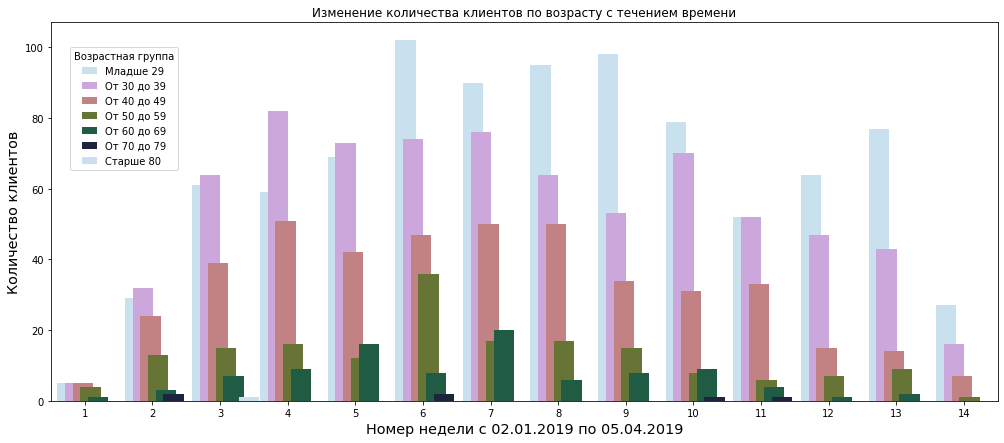

In [92]:
fig, ax = plt.subplots( figsize=(14,6))
ax = sns.countplot(x=data['reg_dttm'].dt.week, hue="age_10",palette = pal,
                   data=data,saturation=0.85)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .05)
        
change_width(ax, .3)
plt.tight_layout()

plt.xlabel('Номер недели с 02.01.2019 по 05.04.2019',fontsize='x-large')
plt.ylabel('Количество клиентов',fontsize='x-large')
plt.title('Изменение количества клиентов по возрасту с течением времени')

plt.legend( ('Младше 29', 'От 30 до 39','От 40 до 49', 'От 50 до 59', 'От 60 до 69', 'От 70 до 79', 'Старше 80' ), 
           fancybox=True,loc=(0.02, 0.61), handlelength=1.5, title='Возрастная группа')

plt.savefig('task1.jpg')

sns.displot(data=data, x=data['reg_dttm'].dt.week, hue="age_10", multiple="stack")

#### Задание 2
Рассматриваем следующий процесс: заявители регистрируются на сайте Тинькофф Квест, где указывают свой возраст. Всех зарегистрированных называем клиентами.


В дальнейшем кто-то из них совершает с созданного аккаунта покупки сертификатов на квест. Будем называть это утилизацией. Число дней от регистрации на сайте до первой покупки будем называть скоростью утилизации.

Постройте диаграмму (или график), которая показывает, как по возрастным сегментам отличается конверсия в утилизацию.

In [96]:
data.head(3)

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date,birth_y,age,age_10
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,2019-01-02,1991,30,30.0
6,820561,1993-10-22,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,2019-01-04,1993,28,30.0
12,820607,1970-09-27,2019-01-05 07:54:45,1.223152e+09,2019-02-21,5000.0,2019-01-05,1970,51,50.0


In [95]:
data = data.dropna()

In [103]:
data['util_vel'] = (data['purchase_dt'].dt.date  - data['reg_date']  ).dt.days

In [115]:
data2 = data.groupby('age_10').mean()

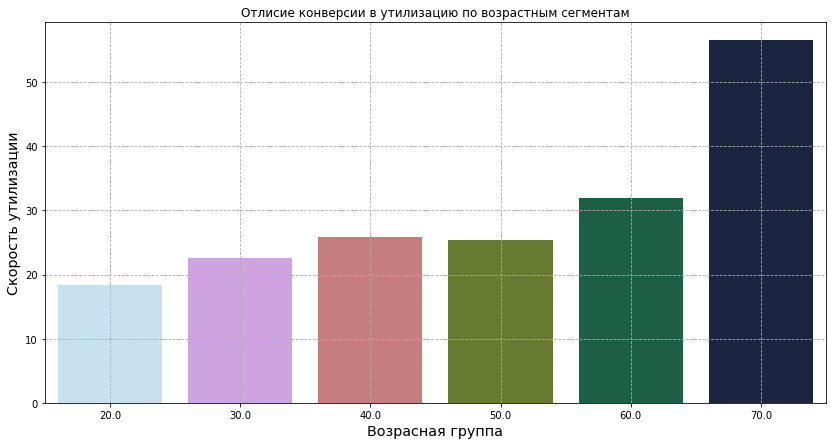

In [133]:
fig, ax = plt.subplots( figsize=(14,7))

labels = ['Младше 29', 'От 30 до 39','От 40 до 49', 'От 50 до 59', 'От 60 до 69', 'От 70 до 79', 'Старше 80' ]

ax = sns.barplot(x ='age_10', y='util_vel', hue_order=labels,palette = pal,ci=None,
                   data=data,saturation=0.95)
ax.grid(linestyle = '--')
# plt.tight_layout()

plt.xlabel('Возрасная группа',fontsize='x-large')
plt.ylabel('Скорость утилизации',fontsize='x-large')
plt.title('Отлисие конверсии в утилизацию по возрастным сегментам')


# plt.legend( ('Младше 29', 'От 30 до 39','От 40 до 49', 'От 50 до 59', 'От 60 до 69', 'От 70 до 79', 'Старше 80' ), 
#            fancybox=True,loc=(0.02, 0.61), handlelength=1.5, title='Возрастная группа')

plt.savefig('task2.jpg')

In [108]:
data.groupby('age_10').mean()

,client_id,purchase_id,purchase_amt,birth_y,age,util_vel
age_10,,,,,,
20.0,827841.598410,1.249499e+09,3044.731610,1998.367793,22.632207,18.361829
30.0,827175.596206,1.250193e+09,3059.620596,1991.433604,29.566396,22.555556
40.0,826669.663636,1.251243e+09,3234.090909,1981.554545,39.445455,25.827273
50.0,826312.815217,1.246691e+09,3222.826087,1971.130435,49.869565,25.326087
60.0,826614.705882,1.261665e+09,2921.568627,1962.607843,58.392157,31.941176
70.0,823280.500000,1.271889e+09,3500.000000,1952.000000,69.000000,56.500000
